In [42]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [43]:
# mouse_drug_data.head()
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [44]:
# Combine the data into a single dataset
combined = pd.merge(clinical_trial_data, mouse_drug_data, on=['Mouse ID','Mouse ID'])

# sort by drug and timepoint
combined_sorted = combined.sort_values(by=['Drug','Timepoint'])

# Display the data table for preview
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [45]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
average_tumor_volume_grouping = combined_sorted.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
average_tumor_volume_grouping = pd.DataFrame(average_tumor_volume_grouping)
average_tumor_volume = average_tumor_volume_grouping.reset_index()
# Preview DataFrame
average_tumor_volume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [46]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_tumor_volume_grouping = combined_sorted.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
std_tumor_volume_grouping = pd.DataFrame(std_tumor_volume_grouping)
std_tumor_volume = std_tumor_volume_grouping.reset_index()
# Preview DataFrame
std_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [47]:
# help(pd.pivot_table)

In [48]:
# Minor Data Munging to Re-Format the Data Frames
reformat = pd.pivot_table(combined_sorted,values='Tumor Volume (mm3)',index='Timepoint',columns='Drug',aggfunc=np.mean)
# Preview that Reformatting worked
reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [49]:
drugs = combined_sorted.Drug.unique()
drugs

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

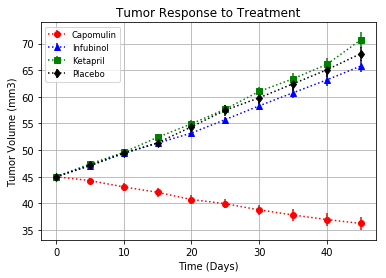

In [50]:
# single out data
Capomulin_average_tumor_volume = average_tumor_volume[average_tumor_volume.Drug == 'Capomulin']
Capomulin_std_tumor_volume = std_tumor_volume[std_tumor_volume.Drug == 'Capomulin']
Infubinol_average_tumor_volume = average_tumor_volume[average_tumor_volume.Drug == 'Infubinol']
Infubinol_std_tumor_volume = std_tumor_volume[std_tumor_volume.Drug == 'Infubinol']
Ketapril_average_tumor_volume = average_tumor_volume[average_tumor_volume.Drug == 'Ketapril']
Ketapril_std_tumor_volume = std_tumor_volume[std_tumor_volume.Drug == 'Ketapril']
Placebo_average_tumor_volume = average_tumor_volume[average_tumor_volume.Drug == 'Placebo']
Placebo_std_tumor_volume = std_tumor_volume[std_tumor_volume.Drug == 'Placebo']

# Generate the Plot (with Error Bars)
max = average_tumor_volume.Timepoint.max()
max = max + 1
x_axis = np.arange(0, max, 5)

fig, ax = plt.subplots()

# error bars
Capomulin=ax.errorbar(x_axis, Capomulin_average_tumor_volume['Tumor Volume (mm3)'], Capomulin_std_tumor_volume['Tumor Volume (mm3)'], fmt="or",ls='dotted') #circle red
Infubinol=ax.errorbar(x_axis, Infubinol_average_tumor_volume['Tumor Volume (mm3)'], Infubinol_std_tumor_volume['Tumor Volume (mm3)'], fmt="^b",ls='dotted') #triangle blue
Ketapril=ax.errorbar(x_axis, Ketapril_average_tumor_volume['Tumor Volume (mm3)'], Ketapril_std_tumor_volume['Tumor Volume (mm3)'], fmt="sg",ls='dotted') #square green
Placebo=ax.errorbar(x_axis, Placebo_average_tumor_volume['Tumor Volume (mm3)'], Placebo_std_tumor_volume['Tumor Volume (mm3)'], fmt="dk",ls='dotted') #diamond black
# Incorporate the other graph properties
plt.xlabel('Time (Days)', fontdict=None, labelpad=None)
plt.ylabel('Tumor Volume (mm3)', fontdict=None, labelpad=None)
plt.title('Tumor Response to Treatment', fontdict=None, loc='center', pad=None)
plt.grid(b=None, which='major', axis='both')

# Create a legend
legend=plt.legend(
    handles=[Capomulin,Infubinol,Ketapril,Placebo],
    labels=['Capomulin','Infubinol','Ketapril','Placebo'],
    fontsize='small',
    markerscale=1
)
# Save the Figure
plt.savefig('Tumor Response to Treatment.png')

In [51]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [52]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
average_metastatic_response_to_treatment_grouping = combined_sorted.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
average_metastatic_response_to_treatment_grouping = pd.DataFrame(average_metastatic_response_to_treatment_grouping)
average_metastatic_response_to_treatment = average_metastatic_response_to_treatment_grouping.reset_index()
# Preview DataFrame
average_metastatic_response_to_treatment_grouping.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [53]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_metastatic_response_to_treatment_grouping = combined_sorted.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
std_metastatic_response_to_treatment_grouping = pd.DataFrame(std_metastatic_response_to_treatment_grouping)
std_metastatic_response_to_treatment = std_metastatic_response_to_treatment_grouping.reset_index()
# Preview DataFrame
std_metastatic_response_to_treatment_grouping.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [54]:
# Minor Data Munging to Re-Format the Data Frames
reformat_metastatic_sites = pd.pivot_table(combined_sorted,values='Metastatic Sites',index='Timepoint',columns='Drug',aggfunc=np.mean)
# Preview that Reformatting worked
reformat_metastatic_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


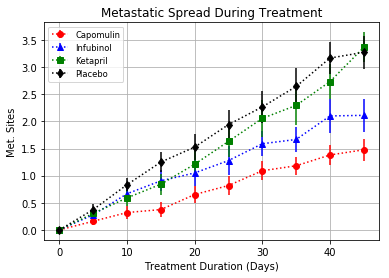

In [55]:
# single out data
Capomulin_average_metastatic_response_to_treatment = average_metastatic_response_to_treatment[average_metastatic_response_to_treatment.Drug == 'Capomulin']
Capomulin_std_metastatic_response_to_treatment = std_metastatic_response_to_treatment[std_metastatic_response_to_treatment.Drug == 'Capomulin']
Infubinol_average_metastatic_response_to_treatment = average_metastatic_response_to_treatment[average_metastatic_response_to_treatment.Drug == 'Infubinol']
Infubinol_std_metastatic_response_to_treatment = std_metastatic_response_to_treatment[std_metastatic_response_to_treatment.Drug == 'Infubinol']
Ketapril_average_metastatic_response_to_treatment = average_metastatic_response_to_treatment[average_metastatic_response_to_treatment.Drug == 'Ketapril']
Ketapril_std_metastatic_response_to_treatment = std_metastatic_response_to_treatment[std_metastatic_response_to_treatment.Drug == 'Ketapril']
Placebo_average_metastatic_response_to_treatment = average_metastatic_response_to_treatment[average_metastatic_response_to_treatment.Drug == 'Placebo']
Placebo_std_metastatic_response_to_treatment = std_metastatic_response_to_treatment[std_metastatic_response_to_treatment.Drug == 'Placebo']

# Generate the Plot (with Error Bars)
max = average_tumor_volume.Timepoint.max()
max = max + 1
x_axis = np.arange(0, max, 5)
fig, ax = plt.subplots()

# error bars
Capomulin=ax.errorbar(x_axis, Capomulin_average_metastatic_response_to_treatment['Metastatic Sites'], Capomulin_std_metastatic_response_to_treatment['Metastatic Sites'], fmt="or",ls='dotted') #circle red
Infubinol=ax.errorbar(x_axis, Infubinol_average_metastatic_response_to_treatment['Metastatic Sites'], Infubinol_std_metastatic_response_to_treatment['Metastatic Sites'], fmt="^b",ls='dotted') #triangle blue
Ketapril=ax.errorbar(x_axis, Ketapril_average_metastatic_response_to_treatment['Metastatic Sites'], Ketapril_std_metastatic_response_to_treatment['Metastatic Sites'], fmt="sg",ls='dotted') #square green
Placebo=ax.errorbar(x_axis, Placebo_average_metastatic_response_to_treatment['Metastatic Sites'], Placebo_std_metastatic_response_to_treatment['Metastatic Sites'], fmt="dk",ls='dotted') #diamond black
# Incorporate the other graph properties
plt.xlabel('Treatment Duration (Days)', fontdict=None, labelpad=None)
plt.ylabel('Met. Sites', fontdict=None, labelpad=None)
plt.title('Metastatic Spread During Treatment', fontdict=None, loc='center', pad=None)
plt.grid(b=None, which='major', axis='both')

# Create a legend
legend=plt.legend(
    handles=[Capomulin,Infubinol,Ketapril,Placebo],
    labels=['Capomulin','Infubinol','Ketapril','Placebo'],
    fontsize='small',
    markerscale=1
)
# Save the Figure
plt.savefig('Metastatic Response to Treatment.png')

## Survival Rates

In [56]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice_grouping = combined_sorted.groupby(['Drug','Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
count_mice_grouping = pd.DataFrame(count_mice_grouping)
count_mice = count_mice_grouping.reset_index()
# Preview DataFrame
count_mice.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [57]:
# Minor Data Munging to Re-Format the Data Frames
reformat_count_mice = pd.pivot_table(combined_sorted,values='Mouse ID',index='Timepoint',columns='Drug',aggfunc='count')
# Preview that Reformatting worked
reformat_count_mice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [58]:
# single out data
Capomulin_count_mice_orig = count_mice[count_mice.Drug == 'Capomulin']
Infubinol_count_mice_orig = count_mice[count_mice.Drug == 'Infubinol']
Ketapril_count_mice_orig = count_mice[count_mice.Drug == 'Ketapril']
Placebo_count_mice_orig = count_mice[count_mice.Drug == 'Placebo']
# convert count of mice to percentage
Capomulin_count_mice = Capomulin_count_mice_orig
max = Capomulin_count_mice_orig['Mouse ID'].max()
Capomulin_count_mice["percentage_mice"] = Capomulin_count_mice_orig['Mouse ID'] / max * 100
Infubinol_count_mice = Infubinol_count_mice_orig
max = Infubinol_count_mice_orig['Mouse ID'].max()
Infubinol_count_mice["percentage_mice"] = Infubinol_count_mice_orig['Mouse ID'] / max * 100
Ketapril_count_mice = Ketapril_count_mice_orig
max = Ketapril_count_mice_orig['Mouse ID'].max()
Ketapril_count_mice["percentage_mice"] = Ketapril_count_mice_orig['Mouse ID'] / max * 100
Placebo_count_mice = Placebo_count_mice_orig
max = Placebo_count_mice_orig['Mouse ID'].max()
Placebo_count_mice["percentage_mice"] = Placebo_count_mice_orig['Mouse ID'] / max * 100

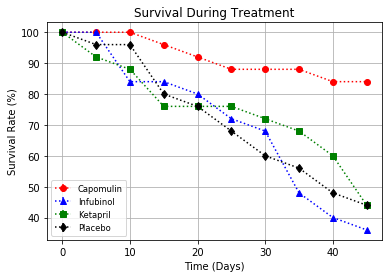

In [59]:
# Generate the Plot (Accounting for percentages)
max = average_tumor_volume.Timepoint.max()
max = max + 1
x_axis = np.arange(0, max, 5)
fig, ax = plt.subplots()

# error bars
Capomulin=ax.errorbar(x_axis, Capomulin_count_mice['percentage_mice'], 0, fmt="or",ls='dotted') #circle red
Infubinol=ax.errorbar(x_axis, Infubinol_count_mice['percentage_mice'], 0, fmt="^b",ls='dotted') #triangle blue
Ketapril=ax.errorbar(x_axis, Ketapril_count_mice['percentage_mice'], 0, fmt="sg",ls='dotted') #square green
Placebo=ax.errorbar(x_axis, Placebo_count_mice['percentage_mice'], 0, fmt="dk",ls='dotted') #diamond black
# Incorporate the other graph properties
plt.xlabel('Time (Days)', fontdict=None, labelpad=None)
plt.ylabel('Survival Rate (%)', fontdict=None, labelpad=None)
plt.title('Survival During Treatment', fontdict=None, loc='center', pad=None)
plt.grid(b=None, which='major', axis='both')

# Create a legend
legend=plt.legend(
    handles=[Capomulin,Infubinol,Ketapril,Placebo],
    labels=['Capomulin','Infubinol','Ketapril','Placebo'],
    fontsize='small',
    markerscale=1
)
# Save the Figure
plt.savefig('Survival Rates.png')

In [60]:
plt.show()

## Summary Bar Graph

In [61]:
# Calculate the percent changes for each drug
# start data
average_tumor_volume_summary = average_tumor_volume
average_tumor_volume_summary = average_tumor_volume_summary.rename(columns={ "Tumor Volume (mm3)": "tumor_volume" })

# get the drugs
drugs = combined_sorted.Drug.unique()
drugs

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [62]:
# for each drug
drug = []
for single_drug in drugs:
#     from the average_tumor_volume_summary, first slice it on the drug and then on the start/end timepoint
    start_volume=average_tumor_volume_summary[average_tumor_volume_summary.Drug == single_drug][average_tumor_volume_summary.Timepoint == 0].tumor_volume
    end_volume=average_tumor_volume_summary[average_tumor_volume_summary.Drug == single_drug][average_tumor_volume_summary.Timepoint == 45].tumor_volume
    change_percentage = (float(end_volume) - float(start_volume)) / float(start_volume) * 100
    drug.append([single_drug,change_percentage])
drug

[['Capomulin', -19.475302667894155],
 ['Ceftamin', 42.516491855897414],
 ['Infubinol', 46.12347172785184],
 ['Ketapril', 57.02879468660604],
 ['Naftisol', 53.923347134769195],
 ['Placebo', 51.29796048315153],
 ['Propriva', 47.24117486320634],
 ['Ramicane', -22.32090046276666],
 ['Stelasyn', 52.085134287898995],
 ['Zoniferol', 46.57975086509522]]

In [63]:
# Store all Relevant Percent Changes into a Tuple
drug_tuple = tuple(drug)
drug_tuple

(['Capomulin', -19.475302667894155],
 ['Ceftamin', 42.516491855897414],
 ['Infubinol', 46.12347172785184],
 ['Ketapril', 57.02879468660604],
 ['Naftisol', 53.923347134769195],
 ['Placebo', 51.29796048315153],
 ['Propriva', 47.24117486320634],
 ['Ramicane', -22.32090046276666],
 ['Stelasyn', 52.085134287898995],
 ['Zoniferol', 46.57975086509522])

In [73]:
drugs_df = pd.DataFrame(drug)
drugs_df = drugs_df.drop(drugs_df.index[[1,4,6,7,8,9]])#same can be done with loc
drugs_df.columns = ["Drug", "perc_volume_change"]
drugs_df = drugs_df.reset_index()
# Splice the data between passing and failing drugs
drugs_x_negative_growth = drugs_df.loc[drugs_df['perc_volume_change'] < 0,'perc_volume_change']
drugs_x_negative_growth_label = drugs_df.loc[drugs_df['perc_volume_change'] < 0,'Drug']
drugs_x_positive_growth = drugs_df.loc[drugs_df['perc_volume_change'] >= 0,'perc_volume_change']
drugs_x_positive_growth_label = drugs_df.loc[drugs_df['perc_volume_change'] >= 0,'Drug']
drugs_df=drugs_df.drop(['index'],axis=1)
drugs_x_negative_growth

0   -19.475303
Name: perc_volume_change, dtype: float64

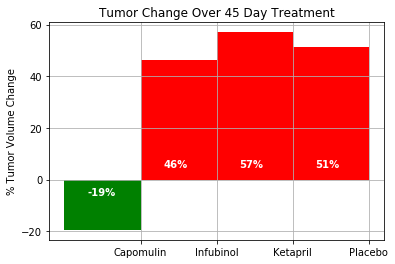

In [96]:
fig, ax = plt.subplots()

# set axis
x_axis = np.arange(1,5,1)  #creates a range starting at 0 exclusive of 5 with a step of 1
ax.set_xticks(x_axis)  #set x axis ticks
ax.yaxis.set_ticks(np.arange(-20,65,20))  #set y axis ticks
x_axis_tick_labels = drugs_df['Drug']  #set x axis labels

# set additional data
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid(b=None, which='major', axis='both')

# data
growth_data = drugs_df['perc_volume_change']

# set colors
bar_colors = []
for number in growth_data:
#     negative amount
    if float(number)<0:
        bar_colors.append('green')
#     positive amount or 0
    else:
        bar_colors.append('red')

# Use functions to label the percentages of changes
def label_percentages():
    x_pos = 0.3
    x_index = 1
    for number in growth_data:
    #     negative amount
        if float(number)<0:
            ax.text(x_pos, -6, '{:.0%}'.format(number / 100), color='white', weight='bold')
    #     positive amount or 0
        else:
            ax.text(x_pos, 5, '{:.0%}'.format(number / 100), color='white', weight='bold')
        x_pos = x_pos + 1
        x_index = x_index + 1
    
# create bar chart
ax.bar(x_axis, growth_data, color=bar_colors, tick_label = x_axis_tick_labels, align="edge", width=-1)
label_percentages()

# alternate scenario with negative and positive split 
#     - works with the exception of the grid line of the negative value as it is overwritten by the second edge

# # Orient widths. Add labels, tick marks, etc. 
# # set_layout() #custom function
# x_negative_axis=np.arange(1,2,1)
# ax.set_xticks(x_negative_axis)
# ax.xaxis.set_ticks(np.arange(x_negative_axis))
# ax.yaxis.set_ticks(np.arange(-20,65,20))
# tick_label_negative = drugs_df.loc[drugs_df['perc_volume_change'] < 0,'Drug']

# x_positive_axis = np.arange(2,5,1)
# ax.set_xticks(x_positive_axis)
# tick_label_positive = drugs_df.loc[drugs_df['perc_volume_change'] >= 0,'Drug']

# #     next can be done through looping through (an) array(s), but I assume this is not the intent of the exercise
# ax.text(0.3, -6, '{:.0%}'.format(drugs_x_negative_growth[0] / 100), color='white', weight='bold')
# ax.text(1.4, 5, '{:.0%}'.format(drugs_x_positive_growth[1] / 100), color='white', weight='bold')
# ax.text(2.4, 5, '{:.0%}'.format(drugs_x_positive_growth[2] / 100), color='white', weight='bold')
# ax.text(3.4, 5, '{:.0%}'.format(drugs_x_positive_growth[3] / 100), color='white', weight='bold')

# plt.title("Tumor Change Over 45 Day Treatment")
# plt.ylabel("% Tumor Volume Change")
# plt.grid(b=None, which='major', axis='both')

# ax.bar(x_negative_axis, drugs_x_negative_growth, color='g', tick_label = tick_label_negative, align="edge",width=-1)

# ax.bar(x_positive_axis, drugs_x_positive_growth, color='r', tick_label = tick_label_positive, align="edge",width=-1)

# # Give our chart some labels and a tile
